XYZ Company has offices in four different zones. The company wishes to
investigate the following :

● The mean sales generated by each zone.

● Total sales generated by all the zones for each month.

● Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [48]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [7]:
#reading and checking dataset

data=pd.read_csv('Sales_data_zone_wise.csv')
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [8]:
#checking for null values

data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [10]:
#info of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


# ● The mean sales generated by each zone.

In [13]:
data.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

Text(0.5, 1.0, 'Mean Sales Generated By Zones')

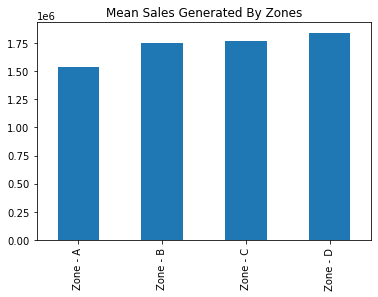

In [22]:

plt.figure()
data.mean().plot(kind="bar")
plt.title('Mean Sales Generated By Zones')

Zone D has generated the highest Mean Sales ,whereas Zone A has generated the lowest mean sales 

# ● Total sales generated by all the zones for each month.

In [29]:
data['Total Sales']=data.iloc[:,1:5].sum(axis=1)
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


Text(0.5, 1.0, 'Total sales generated by all the zones for each month')

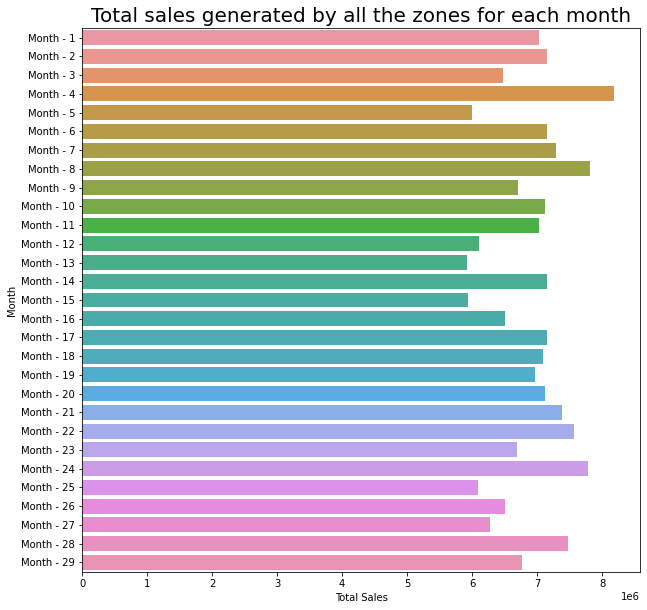

In [55]:
plt.figure(figsize=(10,10))
sns.barplot(x="Total Sales",y="Month",data=data)
plt.title("Total sales generated by all the zones for each month",fontsize=20)

The highest sales was generated in Month 4 and the lowest was in month 13

# ● Check whether all the zones generate the same amount of sales.

In [58]:
import statsmodels.api as stm
from statsmodels.formula.api import ols


In [59]:
from scipy.stats import f_oneway

Null Hypothesis:

H0 : All zones generate the same amount of sales

Alternate Hypothesis:

H1 : All zones generate different amount of sales

In [61]:
f_oneway(data["Zone - A"],data["Zone - B"],data["Zone - C"],data["Zone - D"])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

Here p-value=0.0011827601694503335 which is less than 0.05 ,therefore All the zones generate different amount of sales